In [ ]:
 #importing file1 to colab

from google.colab import files 
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
#importing necessary libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore') #ignore warning messages 


##1- Download ‘breast cancer wisconsin’ data

In [ ]:
#reading the file
df = pd.read_csv("data.csv")

df.head(5)  #displaying first 5 samples from the dataset

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

##2. Remove the missing/infinite values using the mean strategy if required.

In [ ]:
df.info()  #summary info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Drop useless features

df = df.drop(['Unnamed: 32','id'], axis = 1)

In [ ]:
df.describe() #descriptive info

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
count   569.000000    569.000000  ...      569.000000               569.000000
mean     14.127292     19.289649  ...        0.290076                 0.083946
std       3.524049      4.301036  ...        0.061867                 0.018061
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.700000     16.170000  ...        0.250400                 0.071460
50%      13.370000     18.840000  ...        0.282200                 0.080040
75%      15.780000     21.800000  ...        0.317900                 0.092080
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]

In [ ]:
#shows missing values
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# checking for infinity
df.isin([np.inf, -np.inf]).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.shape

(569, 31)

In [ ]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
df.head(5)

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0         M        17.99  ...          0.4601                  0.11890
1         M        20.57  ...          0.2750                  0.08902
2         M        19.69  ...          0.3613                  0.08758
3         M        11.42  ...          0.6638                  0.17300
4         M        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]

In [ ]:
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


B    357
M    212
Name: diagnosis, dtype: int64


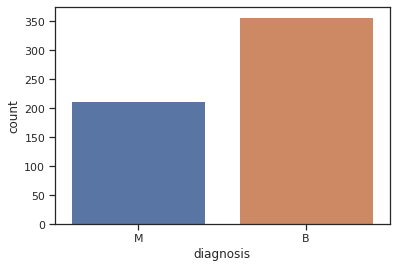

In [ ]:
print(df["diagnosis"].value_counts())

#Visualize this diagnostic count i.e. M & B 
sns.countplot(df['diagnosis'],label="Count")

In [ ]:
#classwise description

cancer_yes = df[df["diagnosis"] == 'M']
cancer_yes.describe()

cancer_no = df[df["diagnosis"] == 'B']
cancer_no.describe()


radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
count   357.000000    357.000000  ...      357.000000               357.000000
mean     12.146524     17.914762  ...        0.270246                 0.079442
std       1.780512      3.995125  ...        0.041745                 0.013804
min       6.981000      9.710000  ...        0.156600                 0.055210
25%      11.080000     15.150000  ...        0.240600                 0.070090
50%      12.200000     17.390000  ...        0.268700                 0.077120
75%      13.370000     19.760000  ...        0.298300                 0.085410
max      17.850000     33.810000  ...        0.422800                 0.148600

[8 rows x 30 columns]

## 3. Visualize the data in 2-D scatter plot and write the inferences, How the data look like.

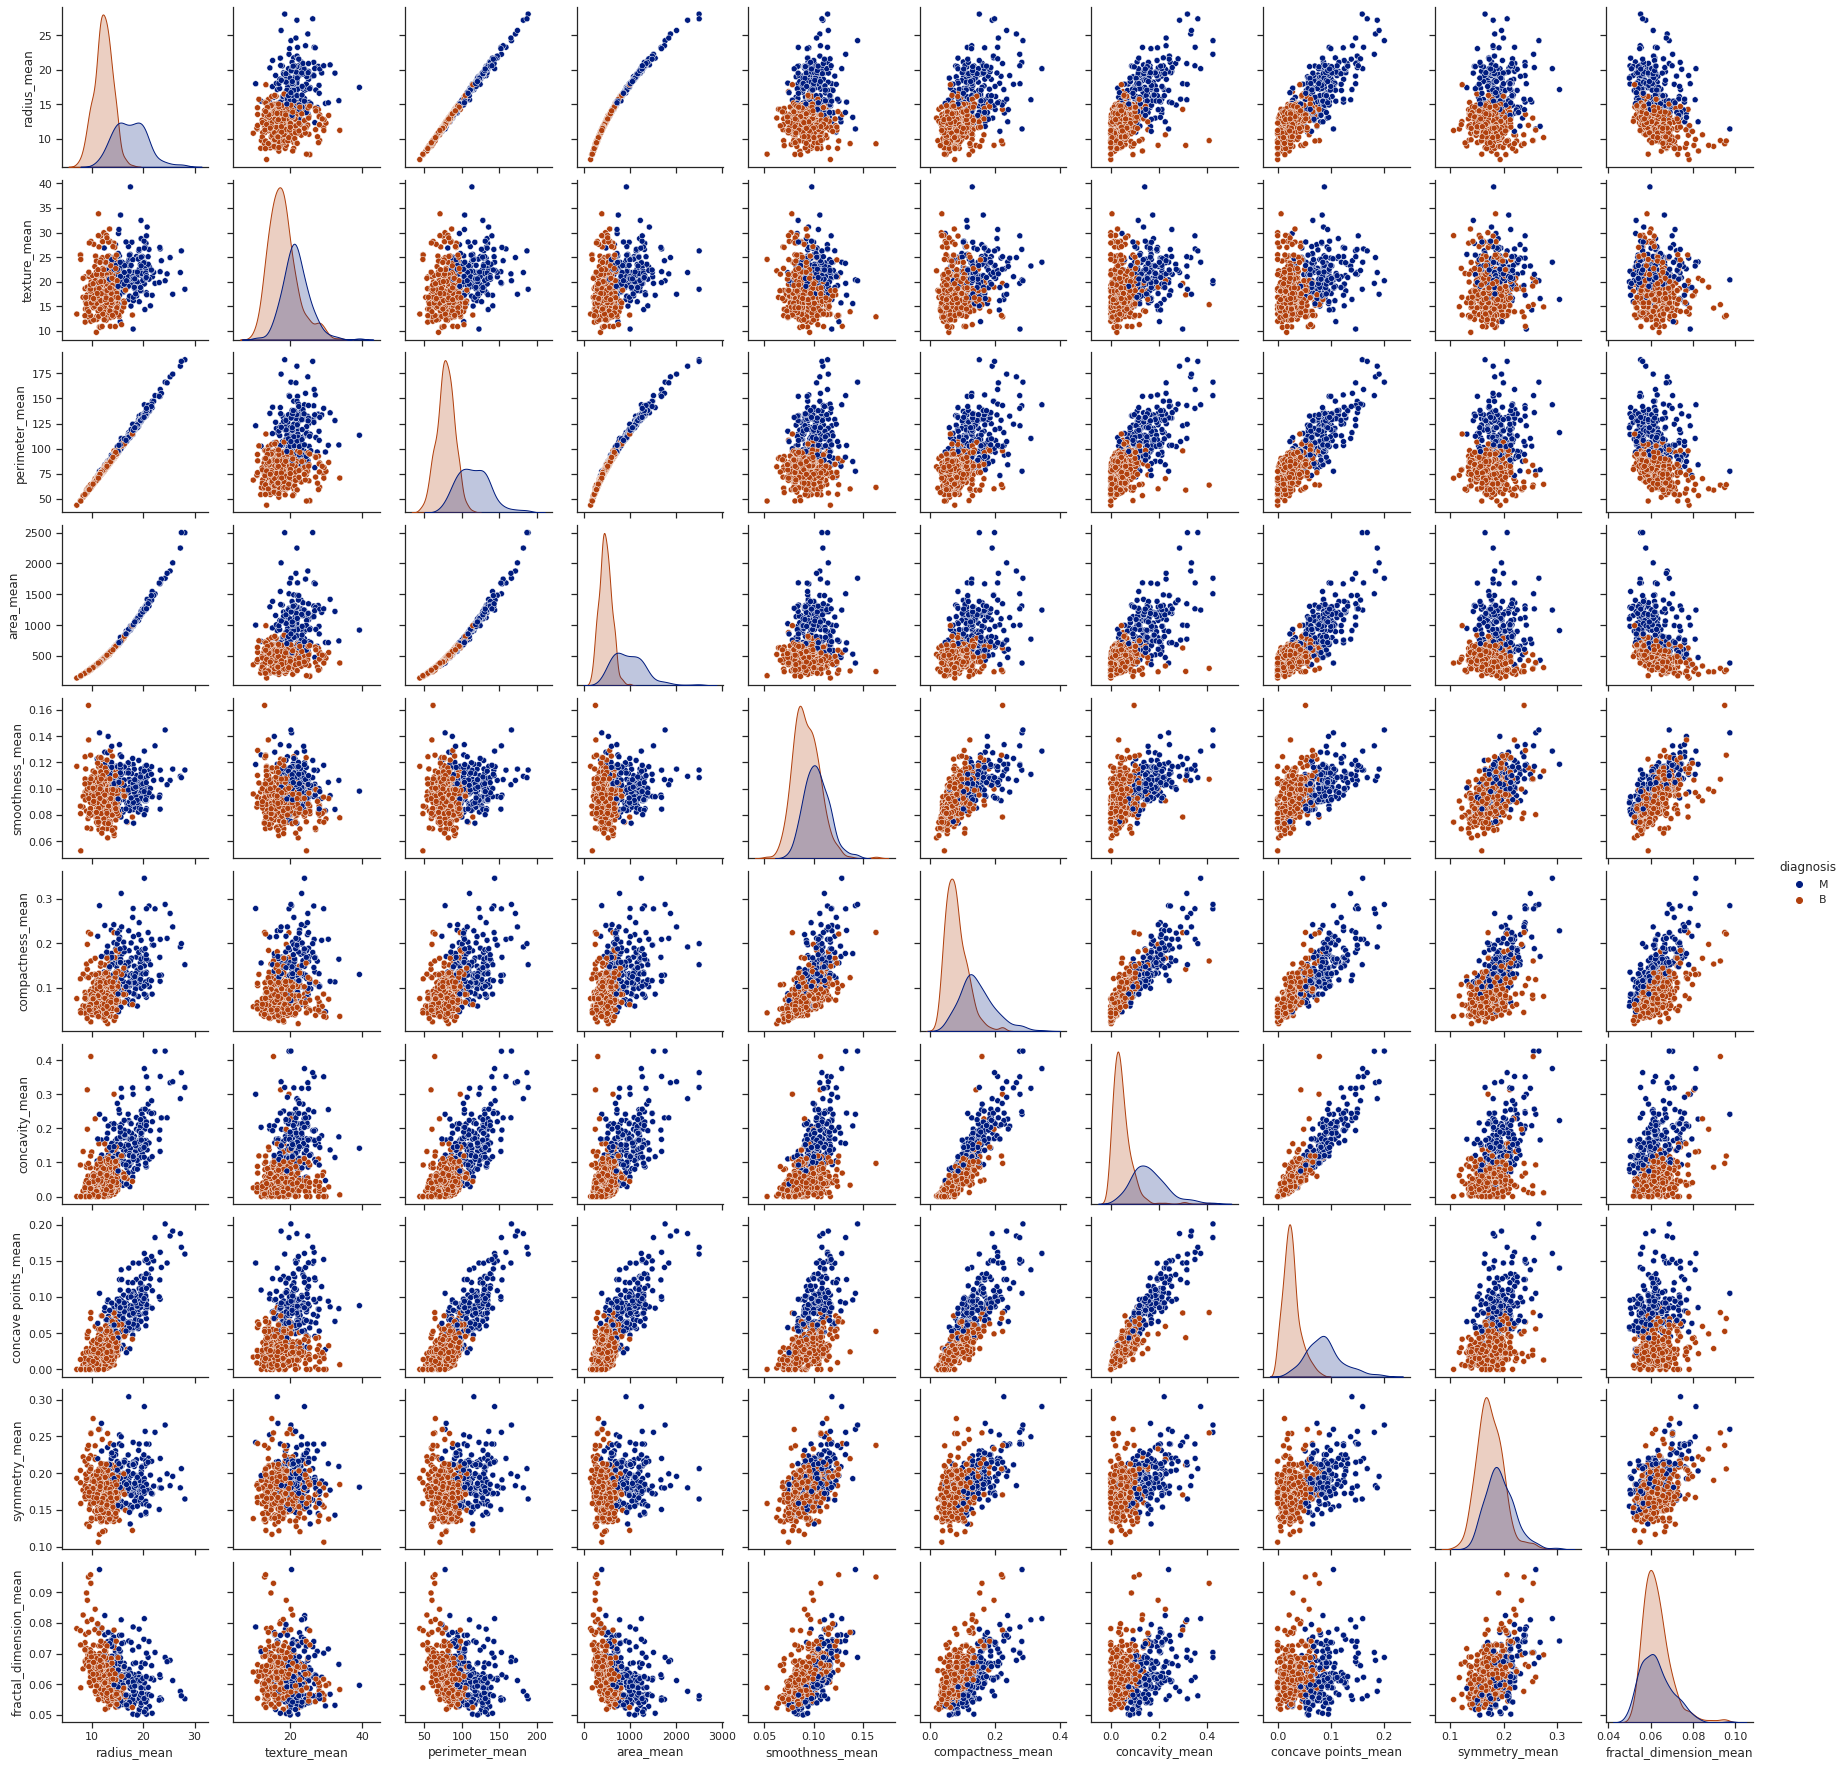

In [ ]:
#exploring mean data

df_mean = df[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 
             'smoothness_mean', 'compactness_mean', 'concavity_mean',
             'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',]]

sns.pairplot(df_mean, palette='dark', hue='diagnosis')


The above mean plots represent the following information-

1- The malignant tumour (M=1, in Red color) has longer range over benign tumor(M=0, in Blue color), for all mean variables except for fractal dimension mean.

2- Peak for malignant tumour (M=1, in Red color) seems to be shifted on the right as compared to benign tumours (M=0, in Blue color). This means that a malignant tumour tends to have larger radius, an uneven texture, large perimeter, more area, more compactness, more concavity and more concave points.

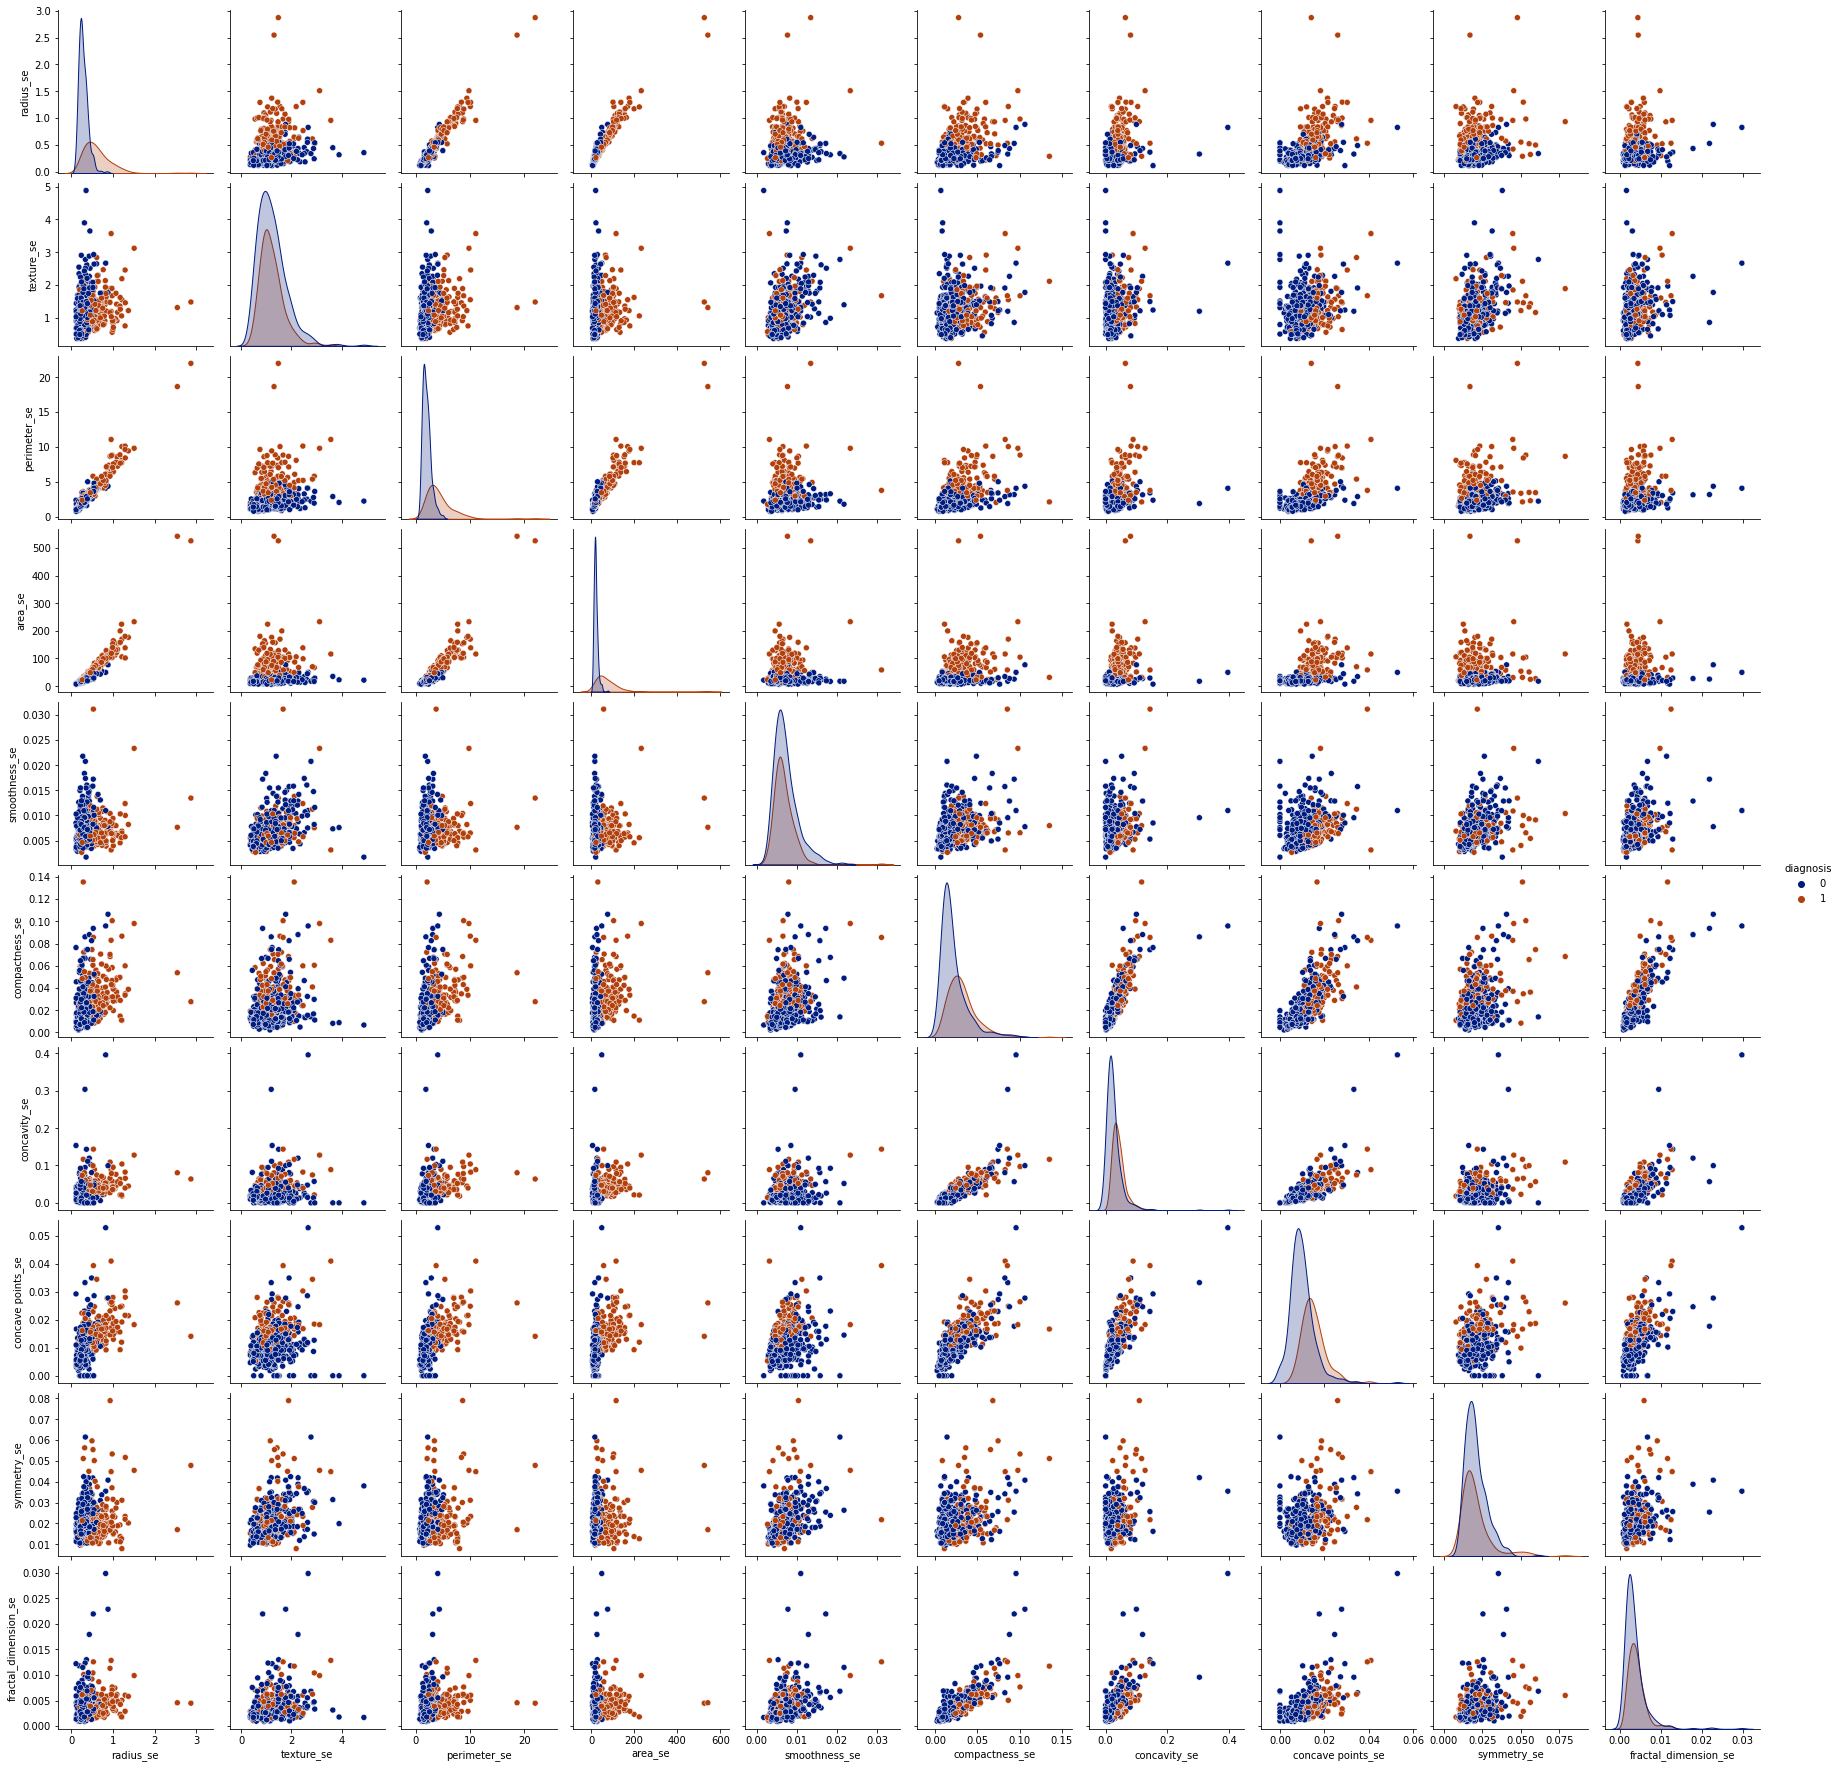

In [ ]:
#exploring standard error data

df_se = df[['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]

sns.pairplot(df_se, palette='dark', hue='diagnosis')


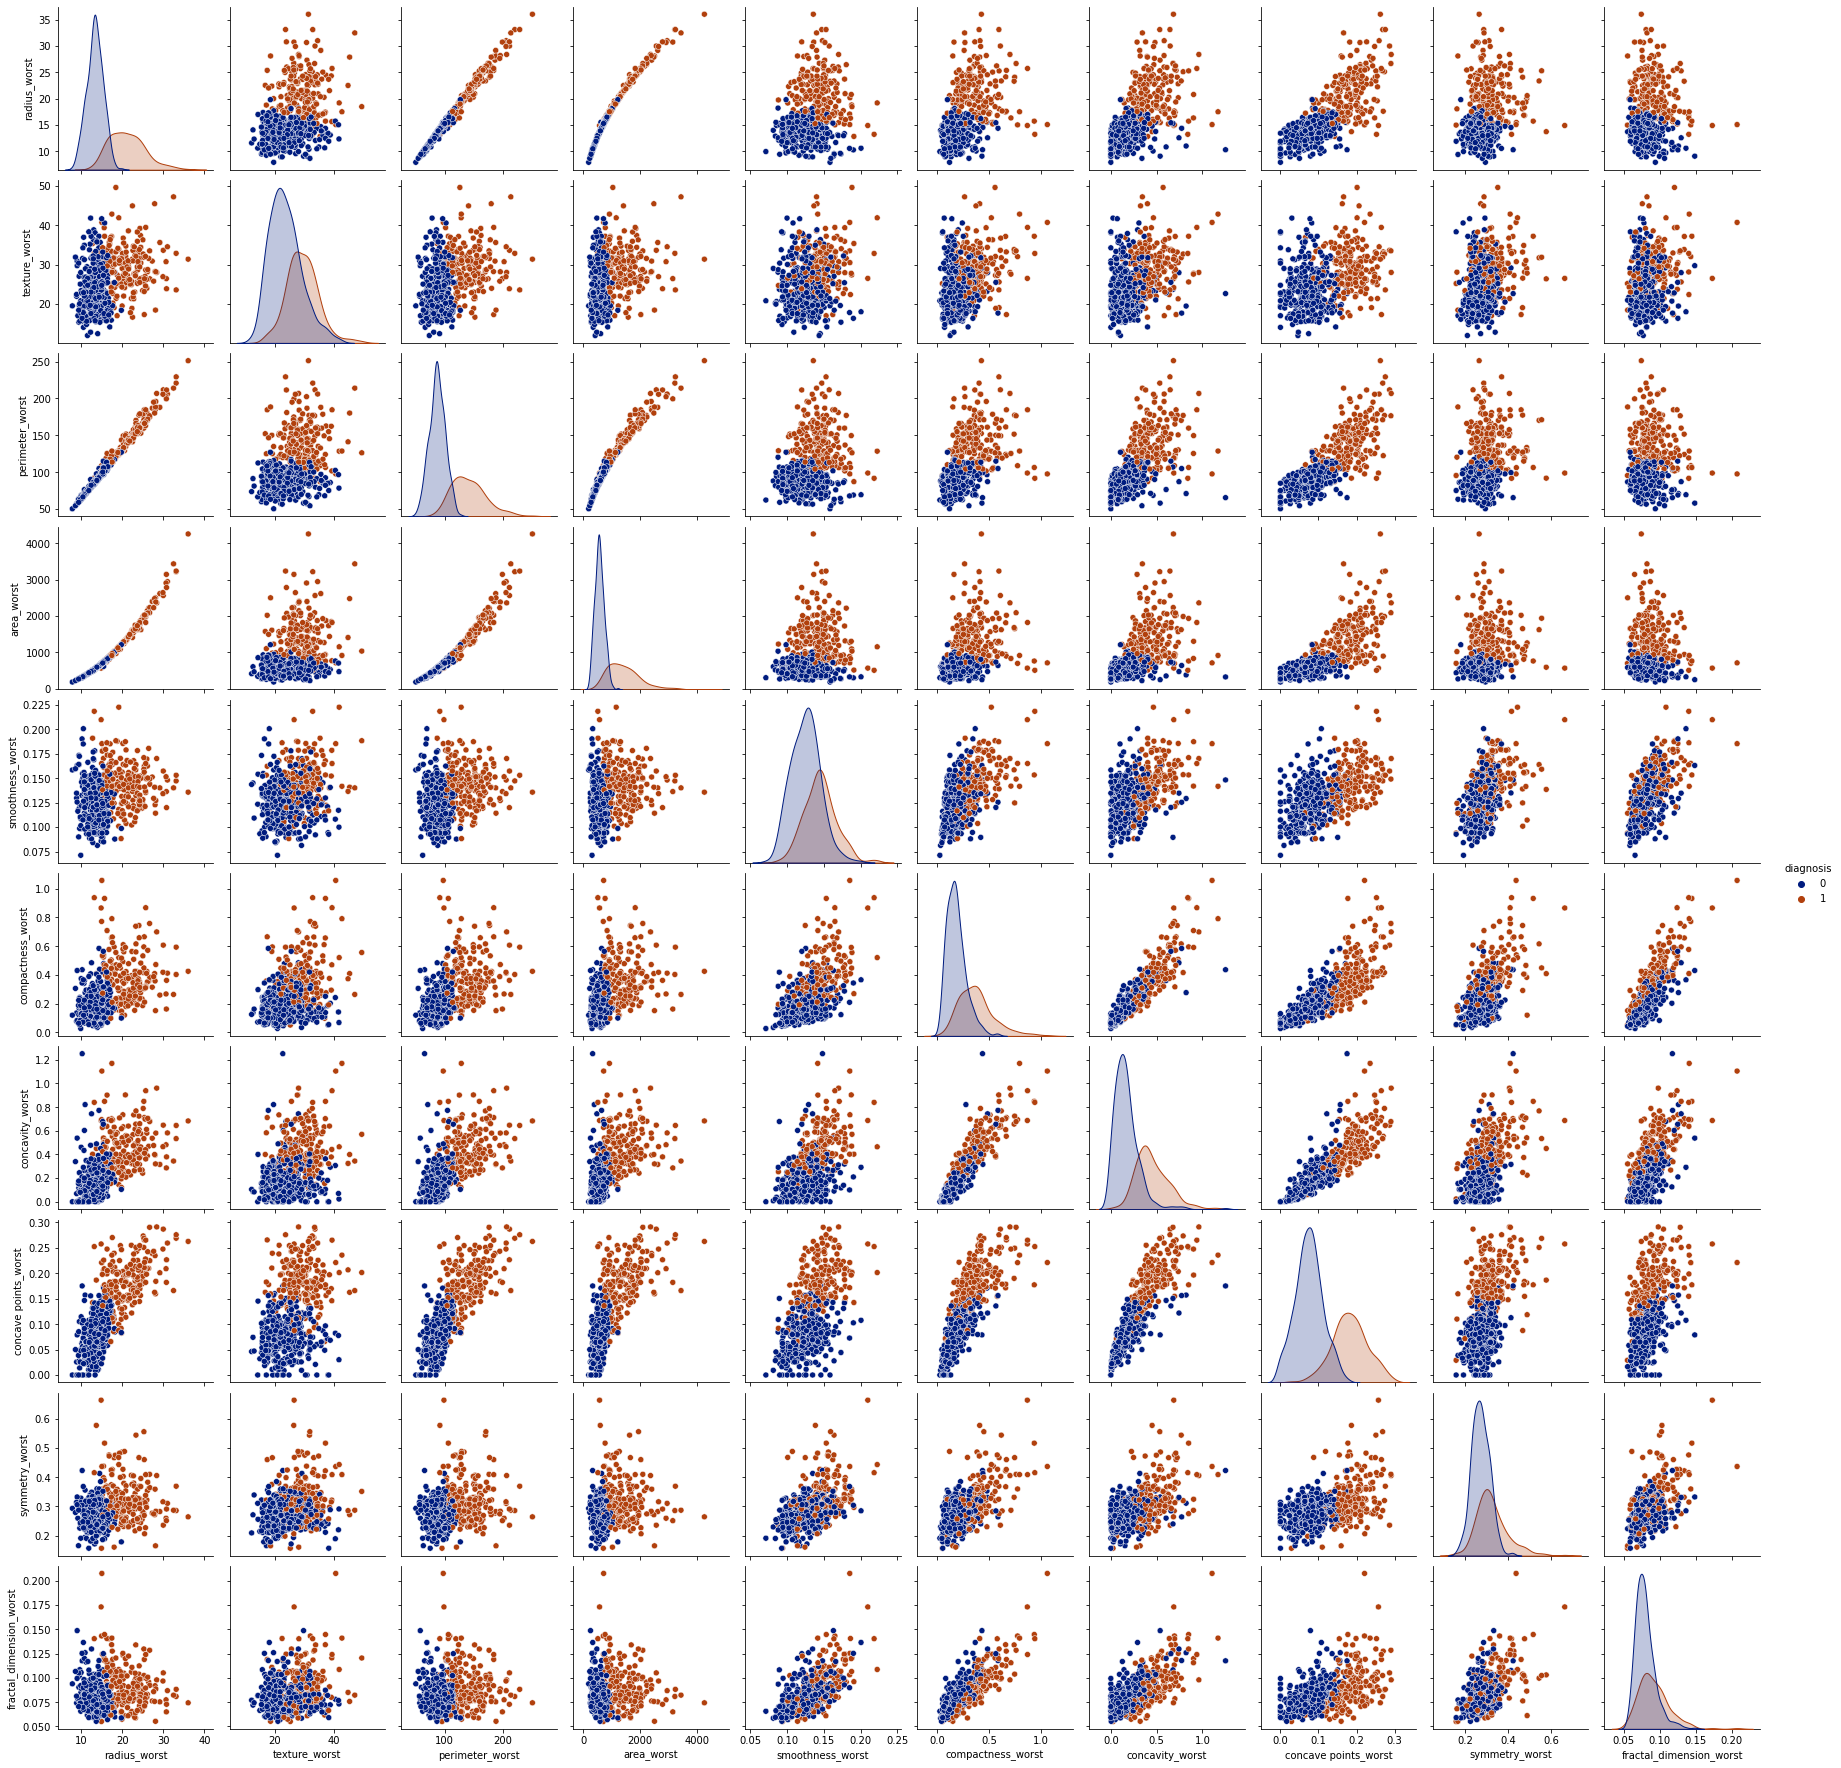

In [ ]:
#exploring worst error data

df_worst = df[['diagnosis', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

sns.pairplot(df_worst, palette='dark', hue='diagnosis')

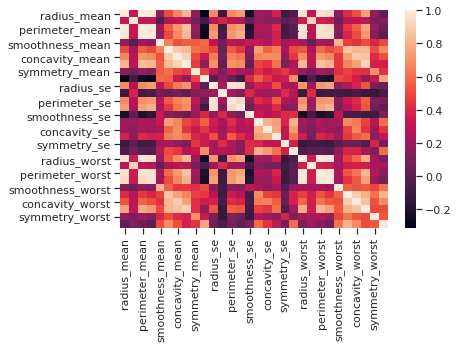

In [ ]:
#studying overall correlation
ax = sns.heatmap(df.corr())

For correlation coefficient, a +1 means a perfect positive correlation, which means if one increases the other also increases. 
While, -1 means the relationship that exists between two variables is negative all the times. (i.e. when one decreases, the other increases)

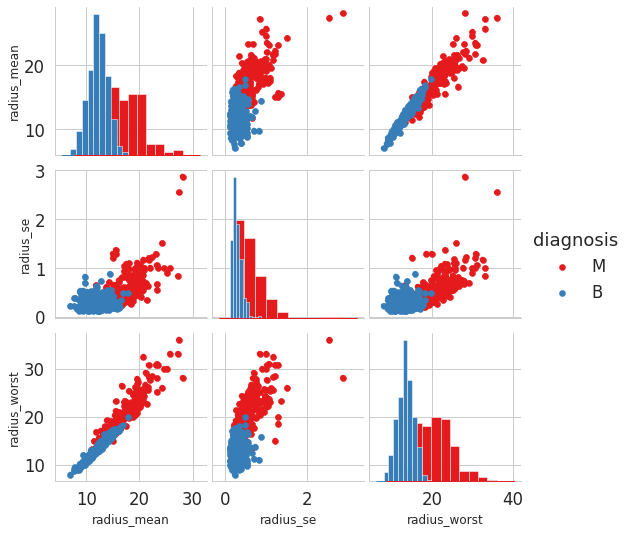

In [ ]:
### 1:
### Diagnosis vs Radius

df_radius = df[['diagnosis', 'radius_mean','radius_se','radius_worst']]

g = sns.pairplot(df_radius,  palette="Set1", hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

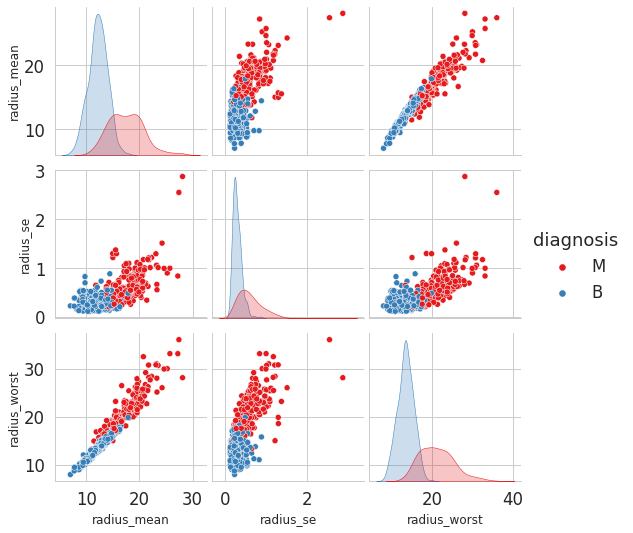

In [ ]:
sns.pairplot(df_radius, palette="Set1", hue='diagnosis')

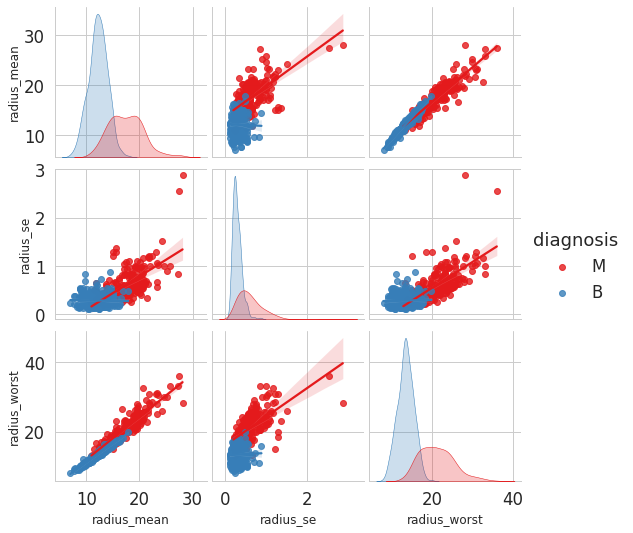

In [ ]:
sns.pairplot(df_radius, palette="Set1", hue='diagnosis', kind="reg")

### 1:
### Diagnosis vs Radius

Observations:
Malignant cells have greater radius than benign cells.


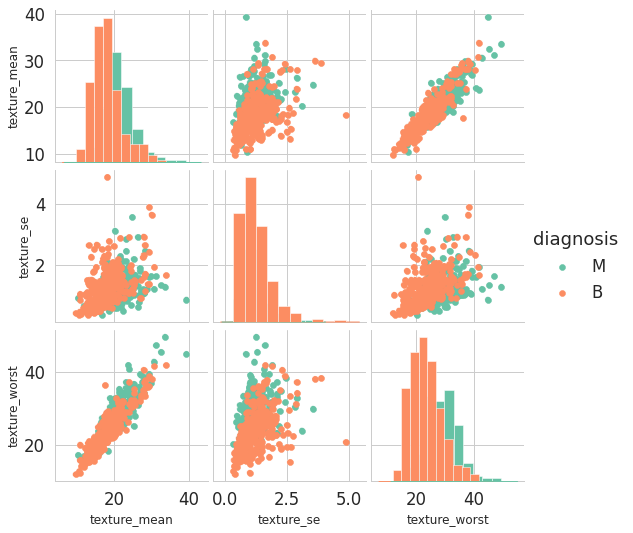

In [ ]:
### 2:
### Diagnosis vs Texture

df_texture = df[['diagnosis', 'texture_mean','texture_se','texture_worst']]

g = sns.pairplot(df_texture,  palette="Set2", hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

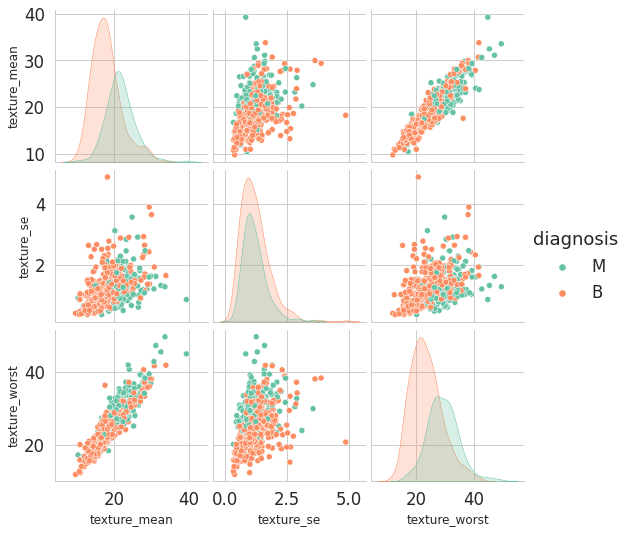

In [ ]:
sns.pairplot(df_texture,  palette="Set2", hue='diagnosis')

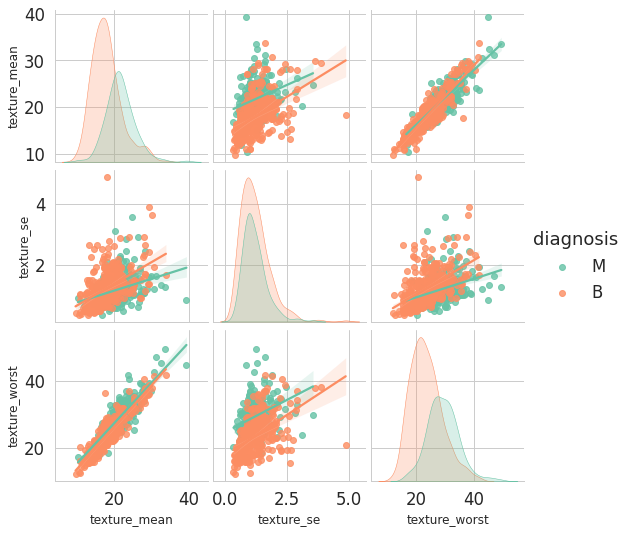

In [ ]:
sns.pairplot(df_texture, palette="Set2", hue='diagnosis', kind="reg")

### 2:
### Diagnosis vs Texture

Observations:
Malignant cells have greater texture than benign cells in general

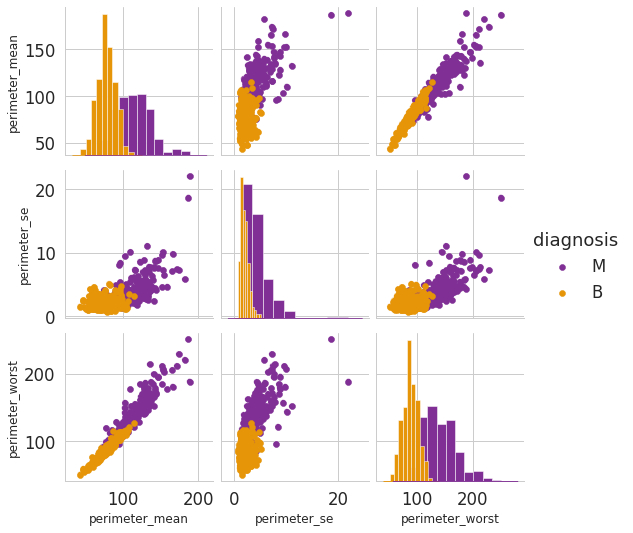

In [ ]:
### 3:
### Diagnosis vs Perimeter

df_perimeter = df[['diagnosis', 'perimeter_mean','perimeter_se','perimeter_worst']]

g = sns.pairplot(df_perimeter,  palette="CMRmap", hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

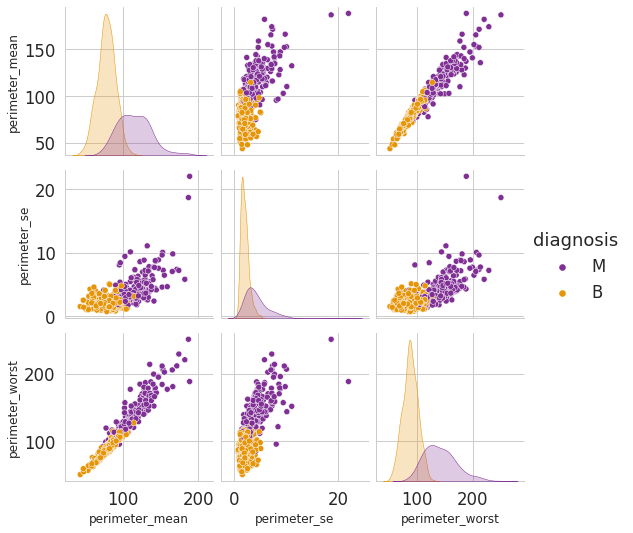

In [ ]:
sns.pairplot(df_perimeter,  palette="CMRmap", hue='diagnosis')

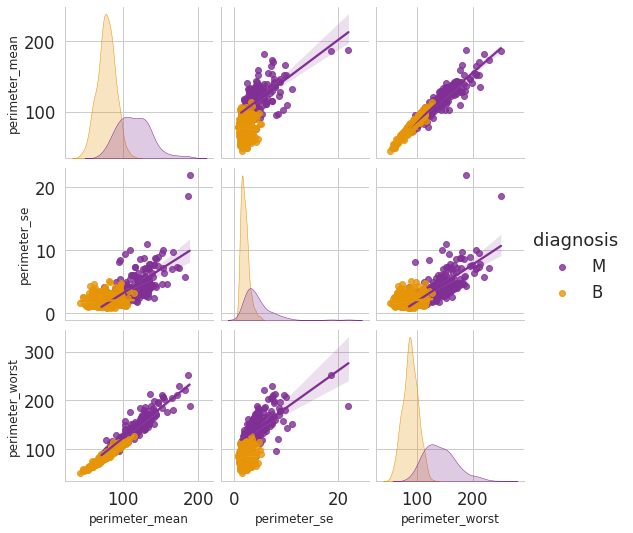

In [ ]:
sns.pairplot(df_perimeter, palette="CMRmap", hue='diagnosis', kind="reg")

### 3:
### Diagnosis vs Perimeter

Observations:
Malignant cells have greater perimeter than benign cells in general



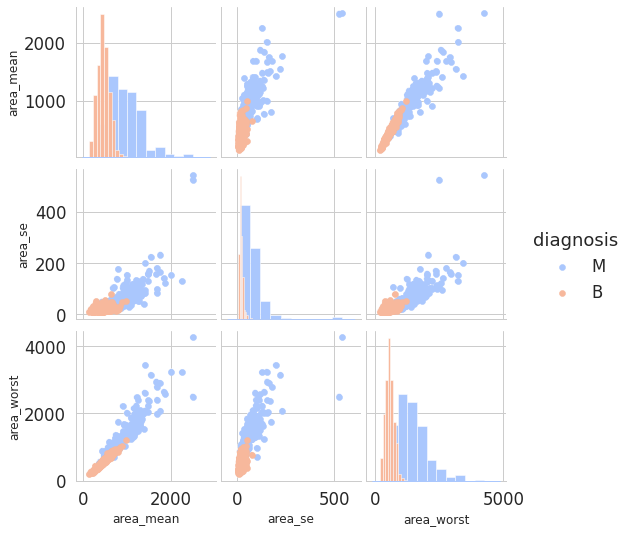

In [ ]:
### 4:
### Diagnosis vs Area

df_area = df[['diagnosis', 'area_mean','area_se','area_worst']]

g = sns.pairplot(df_area,  palette="coolwarm", hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

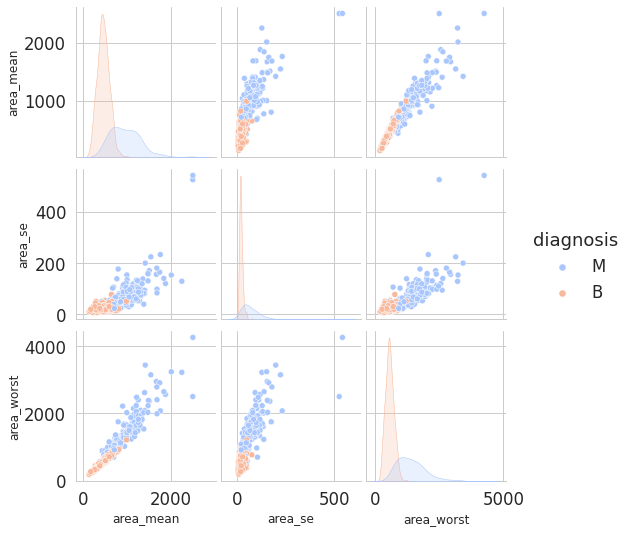

In [ ]:
sns.pairplot(df_area,  palette="coolwarm", hue='diagnosis')

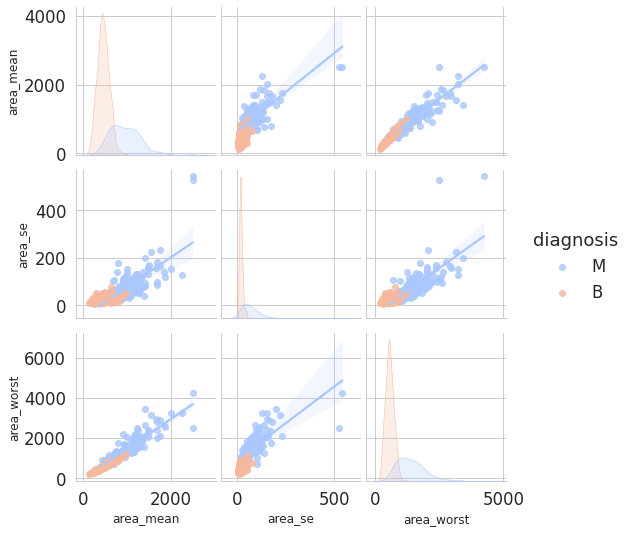

In [ ]:
sns.pairplot(df_area, palette="coolwarm", hue='diagnosis', kind="reg")

### 4:
### Diagnosis vs Area

Observations:
Malignant cells have greater area than benign cells in general.


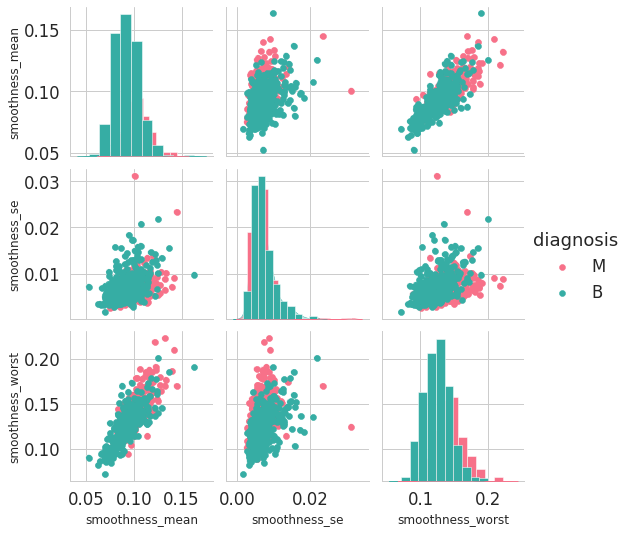

In [ ]:
### 5:
### Diagnosis vs Smoothness

df_smoothness = df[['diagnosis', 'smoothness_mean','smoothness_se','smoothness_worst']]

g = sns.pairplot(df_smoothness,  palette="husl", hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

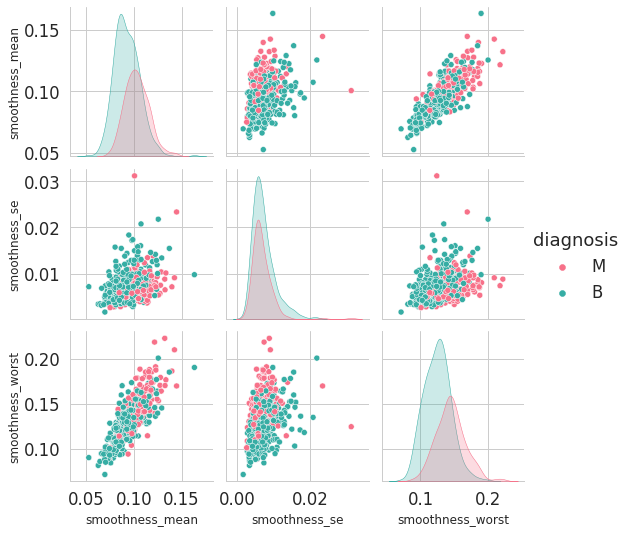

In [ ]:
sns.pairplot(df_smoothness,  palette="husl", hue='diagnosis')

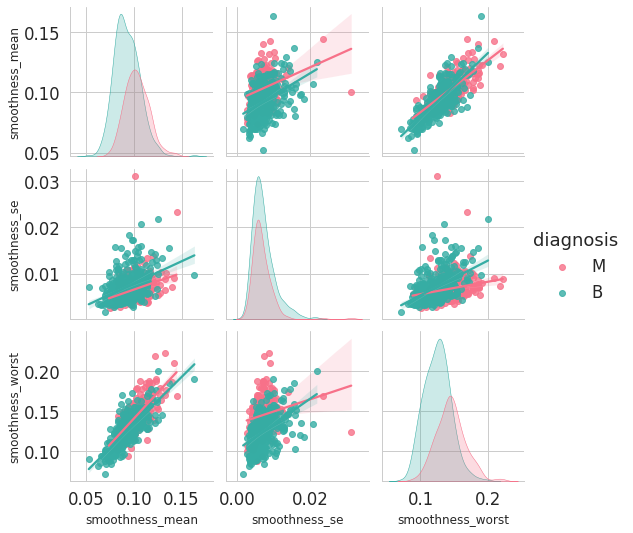

In [ ]:
sns.pairplot(df_smoothness, palette="husl", hue='diagnosis', kind="reg")

### 5:
### Diagnosis vs Smoothness

Observations:
Malignant cells have slightly more smoothness than benign cells.


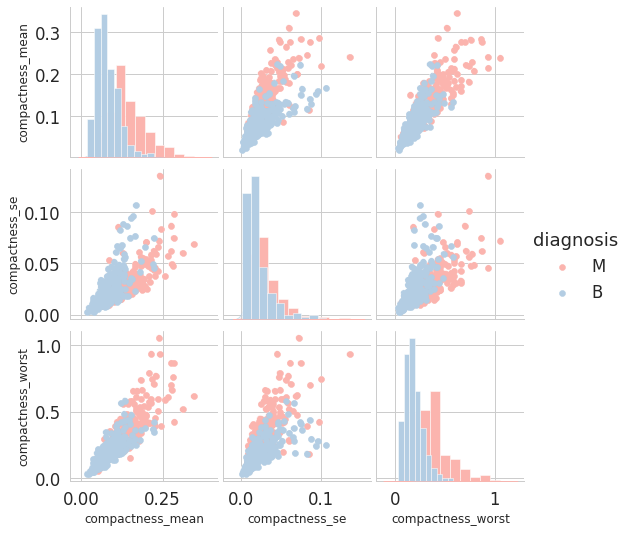

In [ ]:
### 6:
### Diagnosis vs Compactness

df_compactness = df[['diagnosis', 'compactness_mean','compactness_se','compactness_worst']]

g = sns.pairplot(df_compactness,  palette="Pastel1", hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

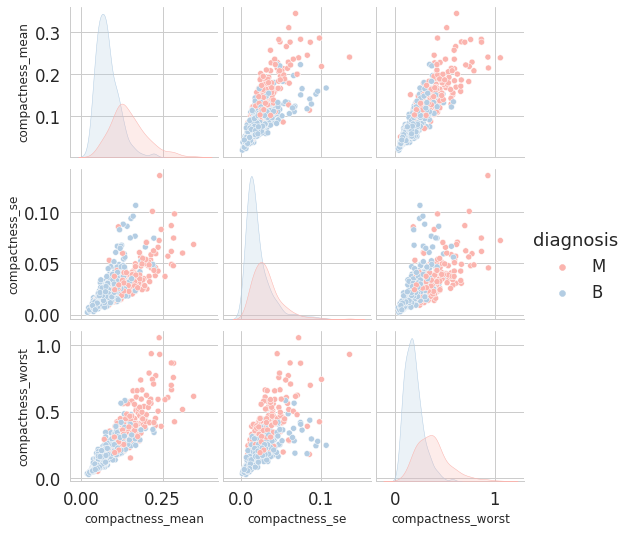

In [ ]:
sns.pairplot(df_compactness,  palette="Pastel1", hue='diagnosis')

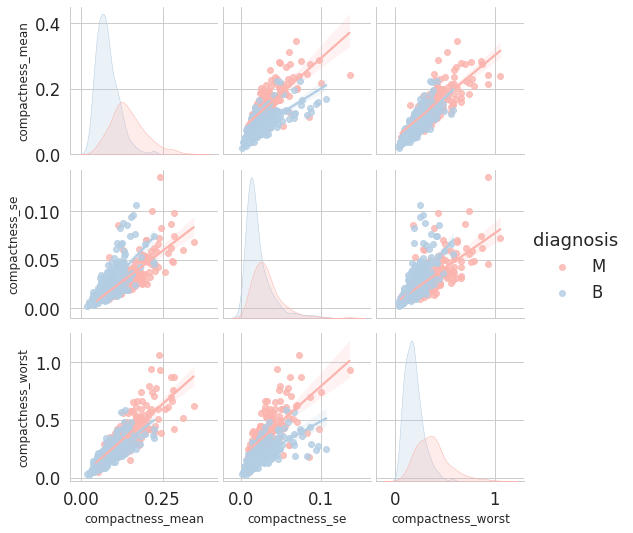

In [ ]:
sns.pairplot(df_compactness, palette="Pastel1", hue='diagnosis', kind="reg")

### 6:
### Diagnosis vs Compactness

Observations:
Malignant cells have more compactness than benign cells in general.

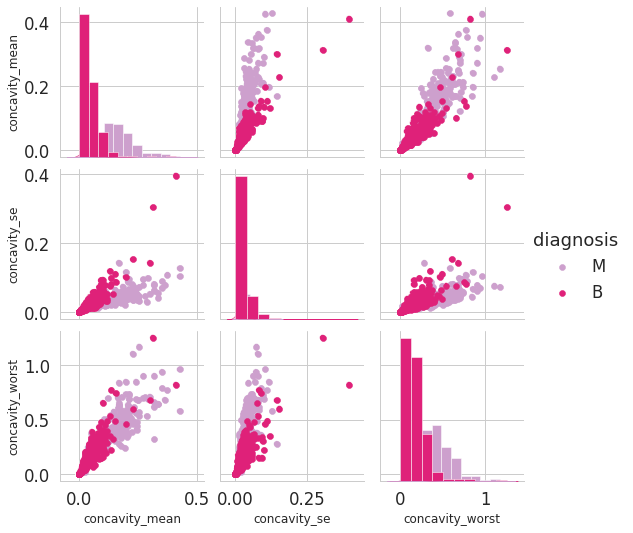

In [ ]:
### 7:
### Diagnosis vs Concavity

df_concavity = df[['diagnosis', 'concavity_mean','concavity_se','concavity_worst']]

g = sns.pairplot(df_concavity,  palette="PuRd", hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

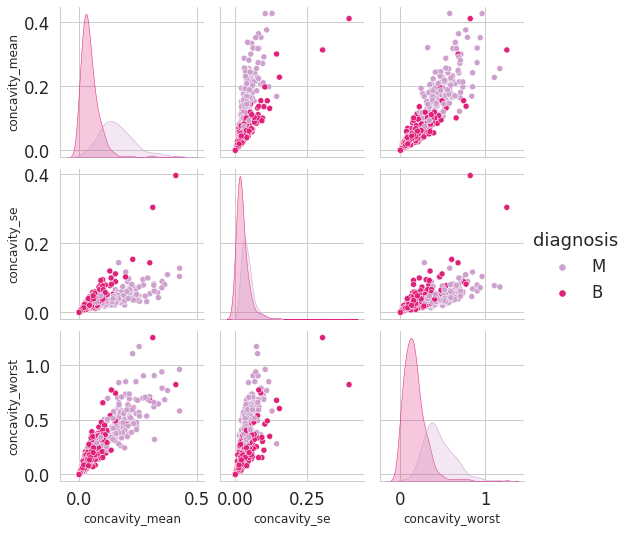

In [ ]:
sns.pairplot(df_concavity,  palette="PuRd", hue='diagnosis')

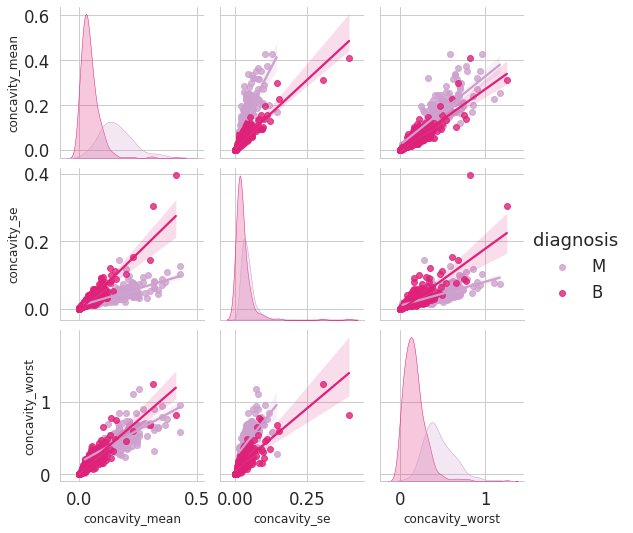

In [ ]:
sns.pairplot(df_concavity, palette="PuRd", hue='diagnosis', kind="reg")

### 7:
### Diagnosis vs Concavity

Observations:
Malignant cells have greater concavity than benign cells, in general.

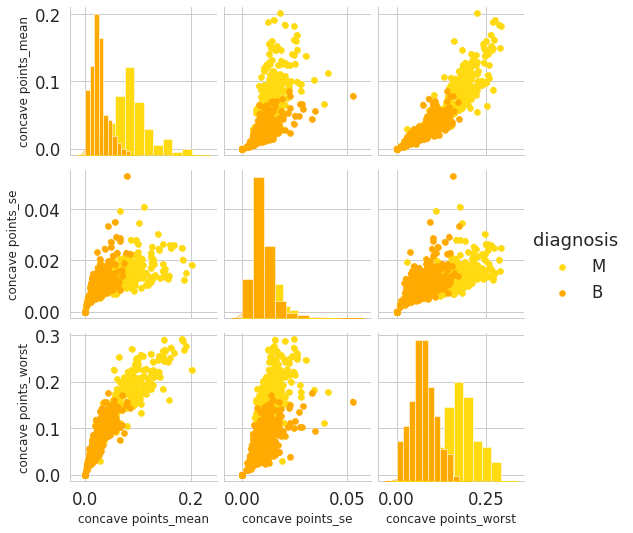

In [ ]:
### 8:
### Diagnosis vs Concave points

df_concave_points = df[['diagnosis', 'concave points_mean','concave points_se','concave points_worst']]

g = sns.pairplot(df_concave_points,  palette="Wistia", hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

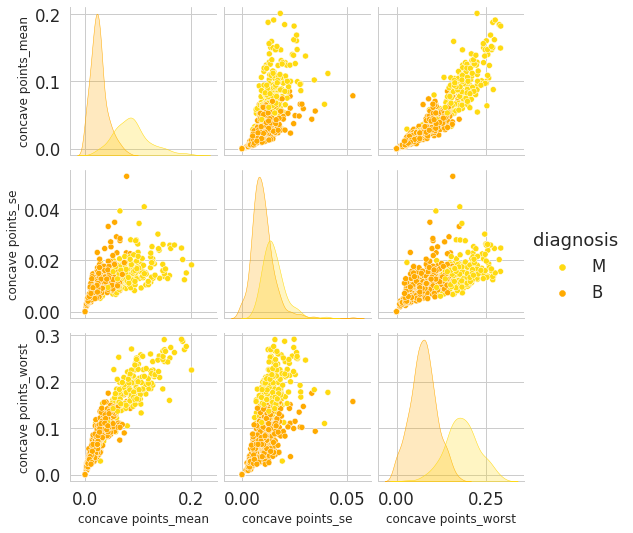

In [ ]:
sns.pairplot(df_concave_points,  palette="Wistia", hue='diagnosis')

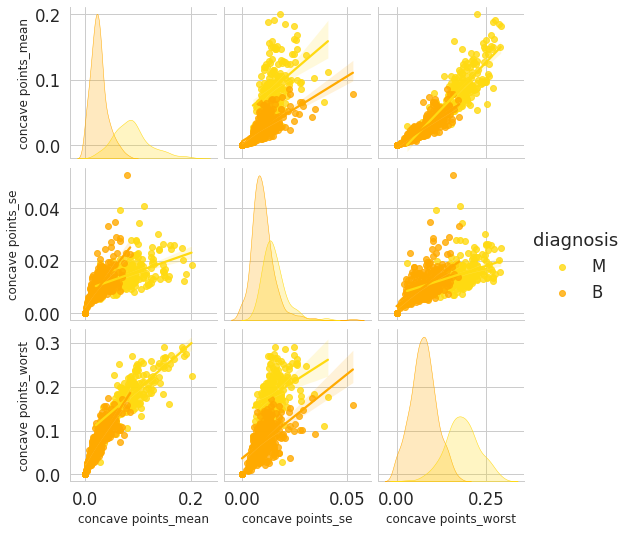

In [ ]:
sns.pairplot(df_concave_points, palette="Wistia", hue='diagnosis', kind="reg")

### 8:
### Diagnosis vs Concave points

Observations:
Malignant cells has very high concave points_mean than benign cells.

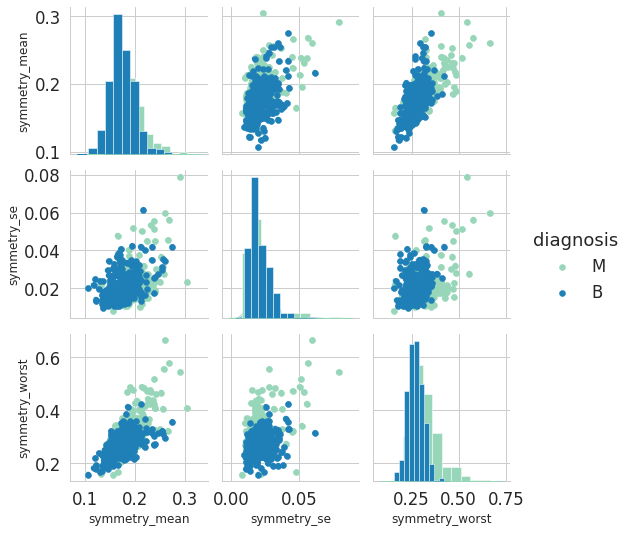

In [ ]:
### 9:
### Diagnosis vs Symmetry

df_symmetry = df[['diagnosis', 'symmetry_mean','symmetry_se','symmetry_worst']]

g = sns.pairplot(df_symmetry,  palette="YlGnBu", hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

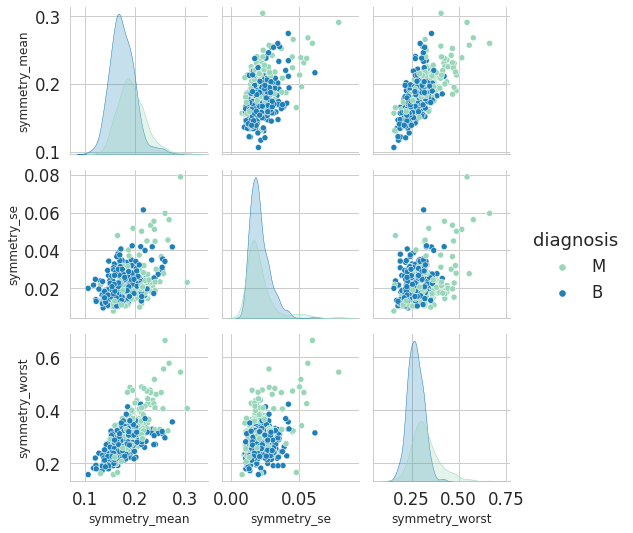

In [ ]:
sns.pairplot(df_symmetry,  palette="YlGnBu", hue='diagnosis')

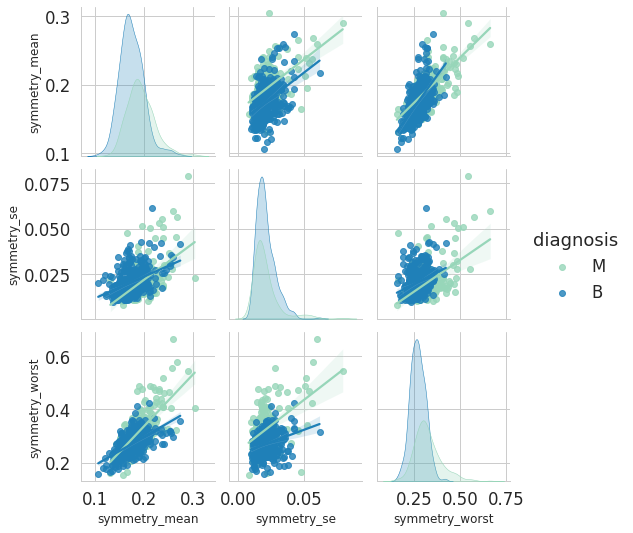

In [ ]:
sns.pairplot(df_symmetry, palette="YlGnBu", hue='diagnosis', kind="reg")

### 9:
### Diagnosis vs Symmetry

Observations:
Malignant cells has slightly a greater symmetry than benign cells.



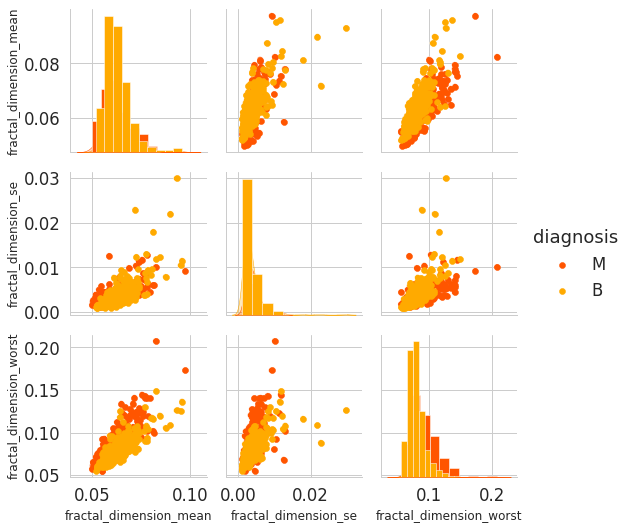

In [ ]:
### 10:
### Diagnosis vs Fractal dimension

df_fractal_dim = df[['diagnosis', 'fractal_dimension_mean','fractal_dimension_se','fractal_dimension_worst']]

g = sns.pairplot(df_fractal_dim,  palette="autumn", hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

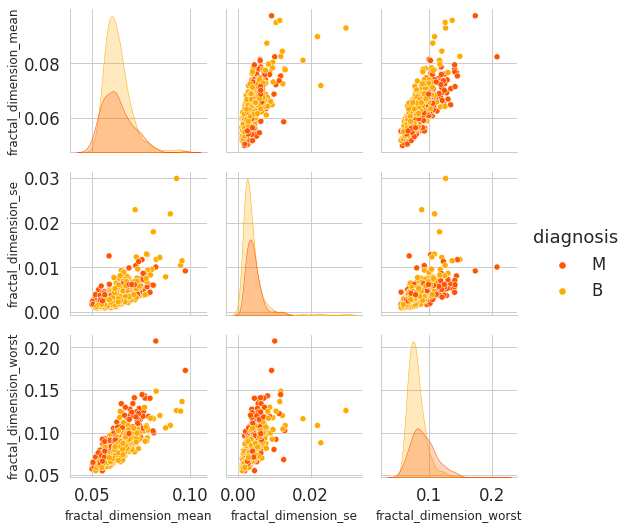

In [ ]:
sns.pairplot(df_fractal_dim,  palette="autumn", hue='diagnosis')

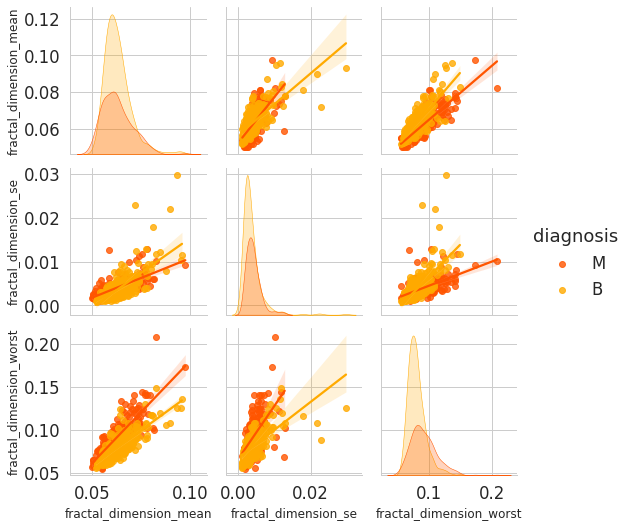

In [ ]:
sns.pairplot(df_fractal_dim, palette="autumn", hue='diagnosis', kind="reg")

### 10:
### Diagnosis vs Fractal dimension

Observations:
For Malignant cells, fractal dimension mean is almost equal to that of benign cells.


##4. Make a boxplot for each feature and highlight the outlier, if any, then remove the outlier, make again box plot to show the outlier effect and write the inferences.

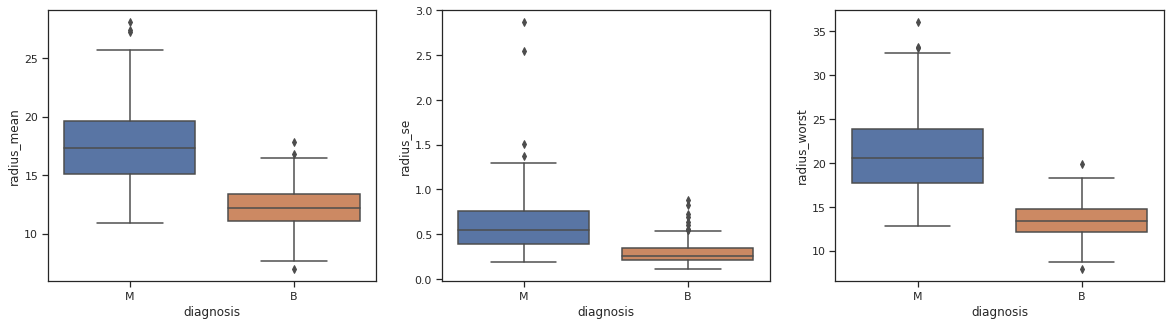

In [ ]:
### Boxplot 1:
### Diagnosis vs Radius

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'radius_mean', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'radius_se', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'radius_worst', data = df)
plt.show()

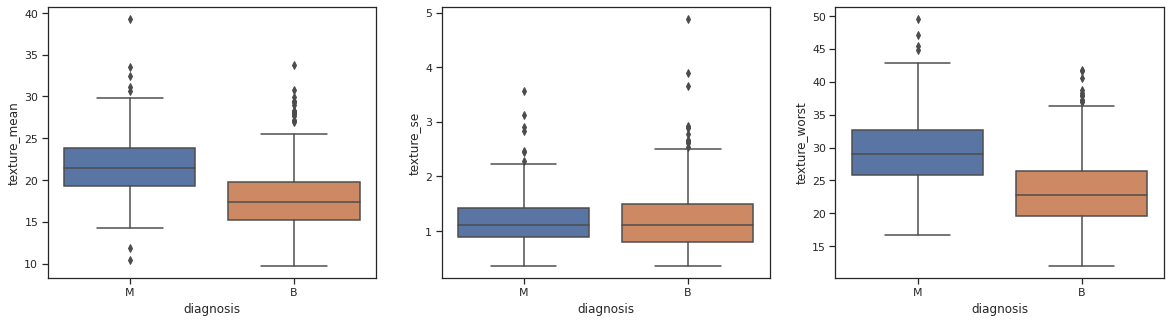

In [ ]:
### Boxplot 2:
### Diagnosis vs Texture

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'texture_mean', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'texture_se', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'texture_worst', data = df)
plt.show()

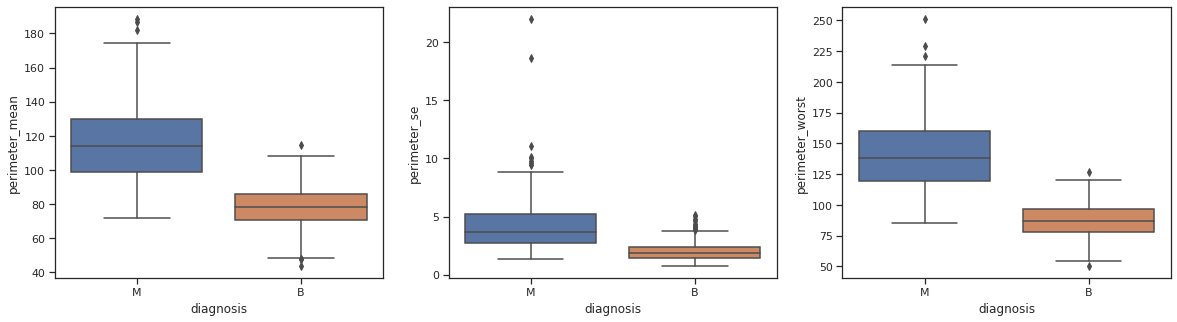

In [ ]:
### Boxplot 3:
### Diagnosis vs Perimeter

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'perimeter_mean', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'perimeter_se', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'perimeter_worst', data = df)
plt.show()

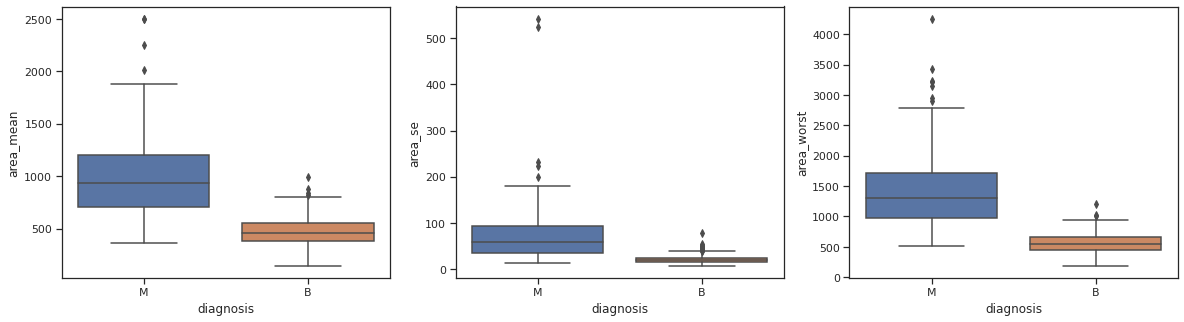

In [ ]:
### Boxplot 4:
### Diagnosis vs Area

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'area_mean', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'area_se', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'area_worst', data = df)
plt.show()

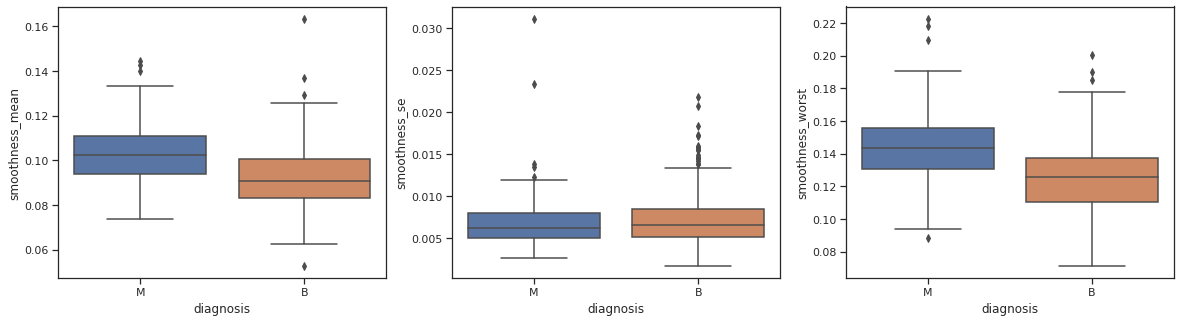

In [ ]:
### Boxplot 5:
### Diagnosis vs Smoothness

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'smoothness_mean', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'smoothness_se', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'smoothness_worst', data = df)
plt.show()

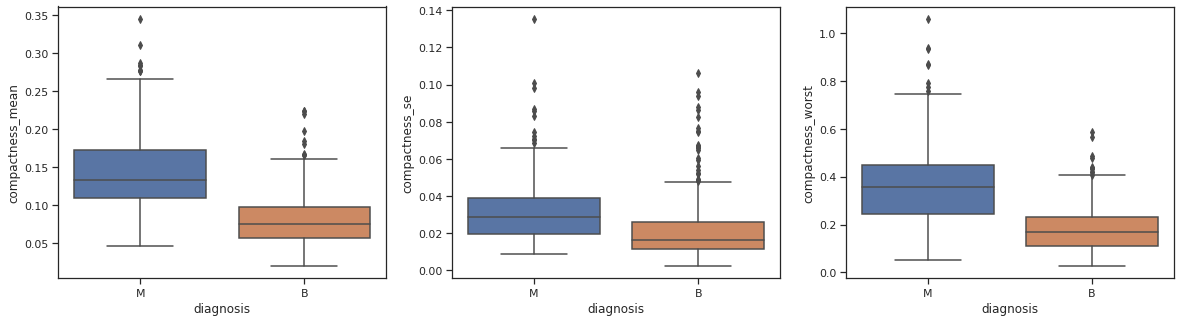

In [ ]:
### Boxplot 6:
### Diagnosis vs Compactness

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'compactness_mean', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'compactness_se', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'compactness_worst', data = df)
plt.show()

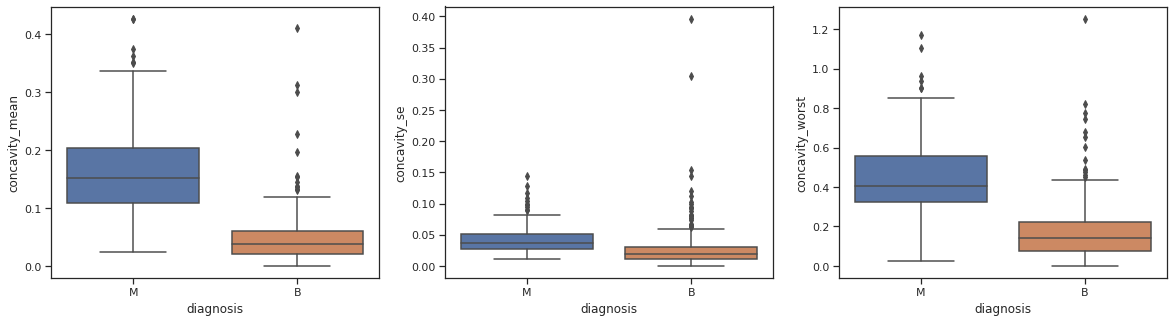

In [ ]:
### Boxplot 7:
### Diagnosis vs Concavity

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'concavity_mean', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'concavity_se', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'concavity_worst', data = df)
plt.show()

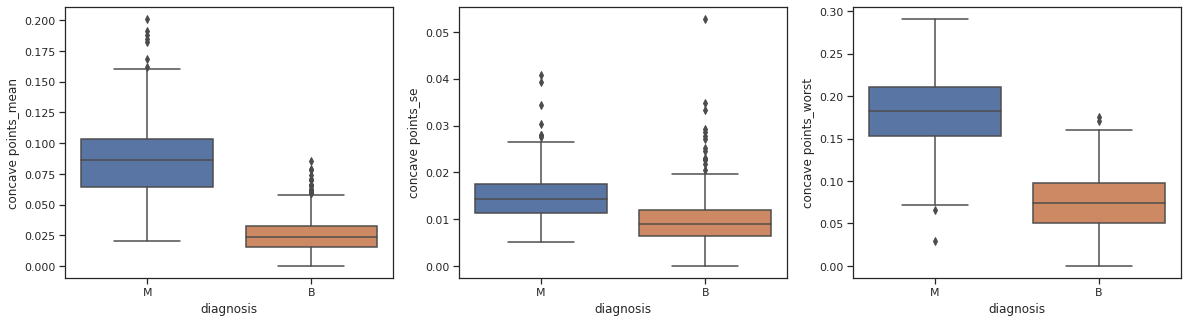

In [ ]:
### Boxplot 8:
### Diagnosis vs Concave points

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'concave points_mean', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'concave points_se', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'concave points_worst', data = df)
plt.show()

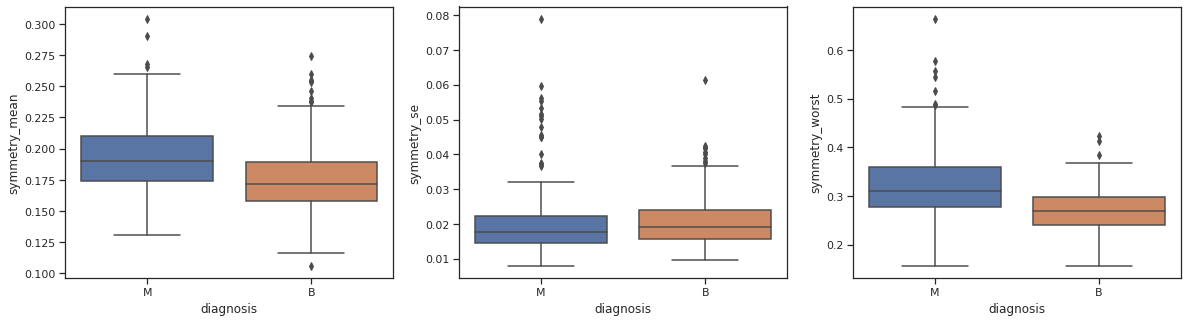

In [ ]:
### Boxplot 9:
### Diagnosis vs Symmetry

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'symmetry_mean', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'symmetry_se', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'symmetry_worst', data = df)
plt.show()

In [ ]:
### Boxplot 10:
### Diagnosis vs Fractal_dimension

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'fractal_dimension_mean', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'fractal_dimension_se', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'fractal_dimension_worst', data = df)
plt.show()

NameError: ignored


##Observations of Boxplot- 
isolated points that can be seen in the box-plots above are the outliers in the dataset

In [ ]:
#removing outliers using Inter-Quartile Range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_worst            0.191900
concavity_wo

(398, 31)

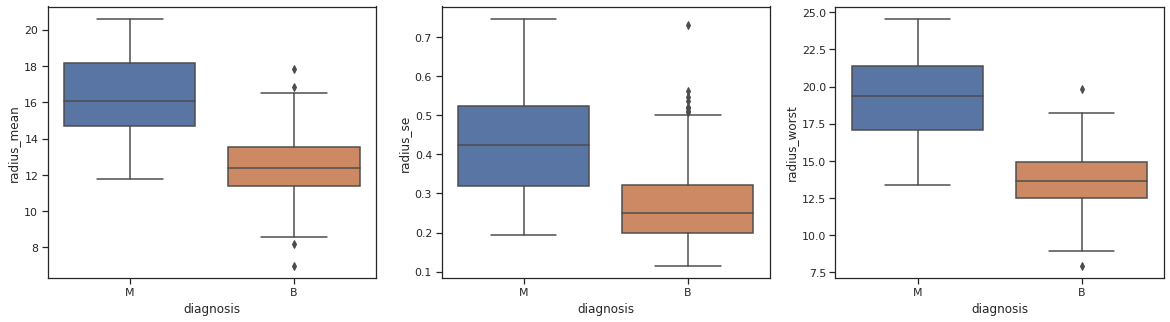

In [ ]:
### Boxplot 1:
### Diagnosis vs Radius

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'radius_mean', data = df_out)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'radius_se', data = df_out)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'radius_worst', data = df_out)
plt.show()

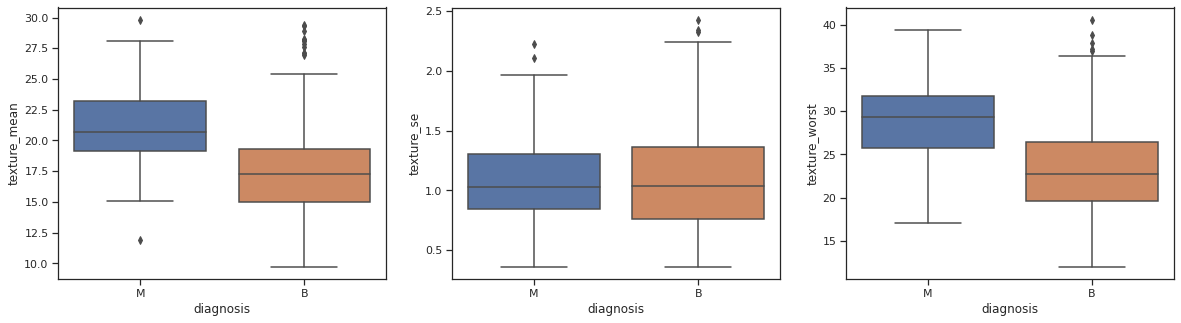

In [ ]:
### Boxplot 2:
### Diagnosis vs Texture

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'texture_mean', data = df_out)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'texture_se', data = df_out)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'texture_worst', data = df_out)
plt.show()

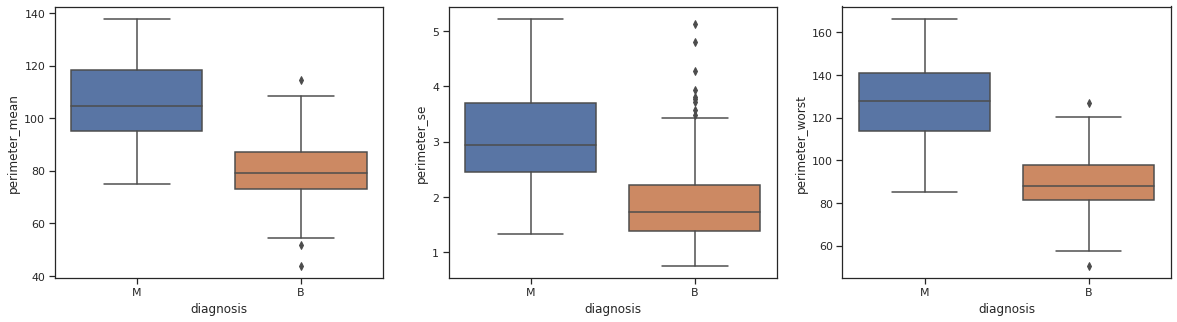

In [ ]:
### Boxplot 3:
### Diagnosis vs Perimeter

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'perimeter_mean', data = df_out)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'perimeter_se', data = df_out)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'perimeter_worst', data = df_out)
plt.show()

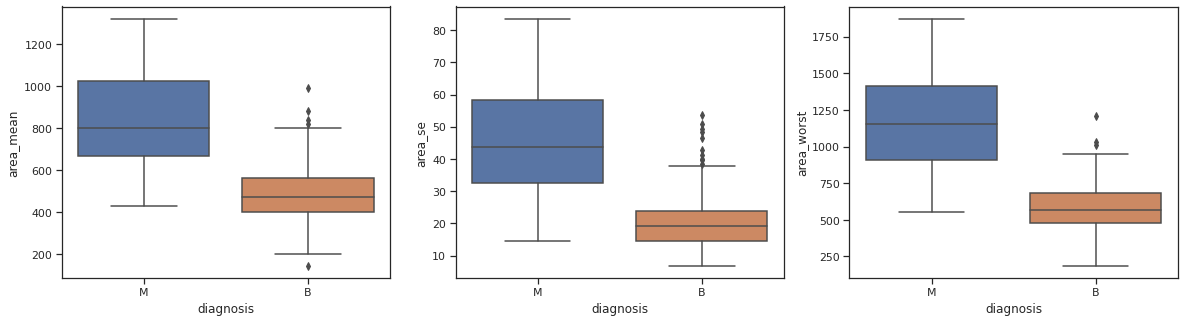

In [ ]:
### Boxplot 4:
### Diagnosis vs Area

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'area_mean', data = df_out)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'area_se', data = df_out)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'area_worst', data = df_out)
plt.show()

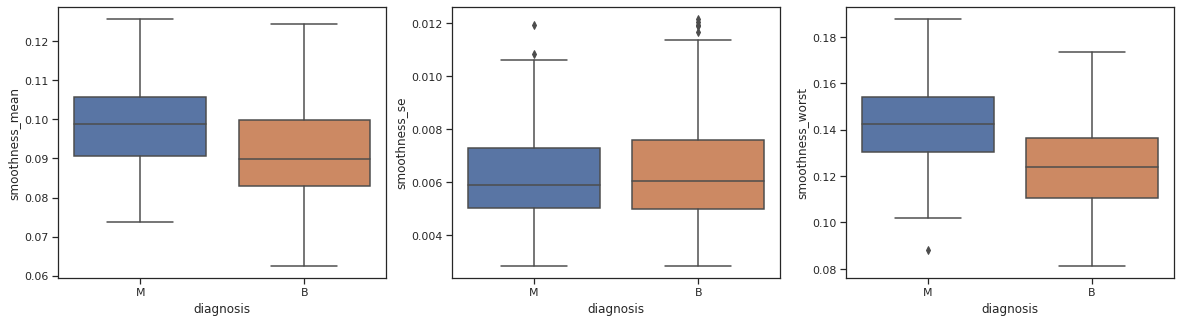

In [ ]:
### Boxplot 5:
### Diagnosis vs Smoothness

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'smoothness_mean', data = df_out)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'smoothness_se', data = df_out)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'smoothness_worst', data = df_out)
plt.show()

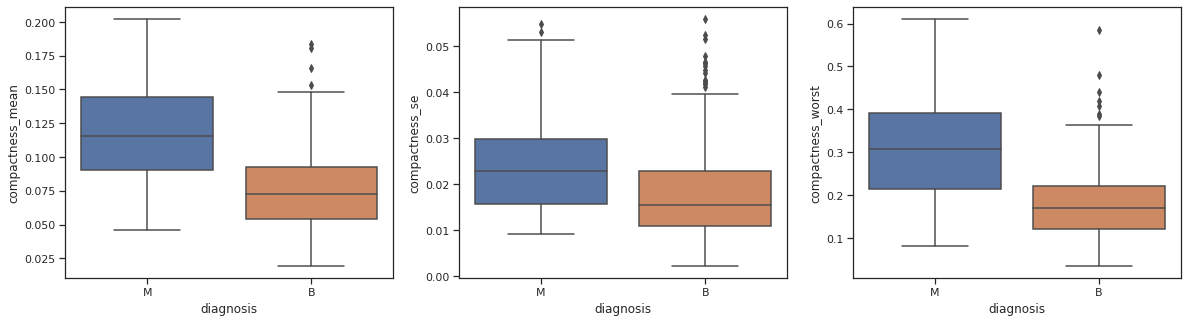

In [ ]:
### Boxplot 6:
### Diagnosis vs Compactness

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'compactness_mean', data = df_out)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'compactness_se', data = df_out)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'compactness_worst', data = df_out)
plt.show()

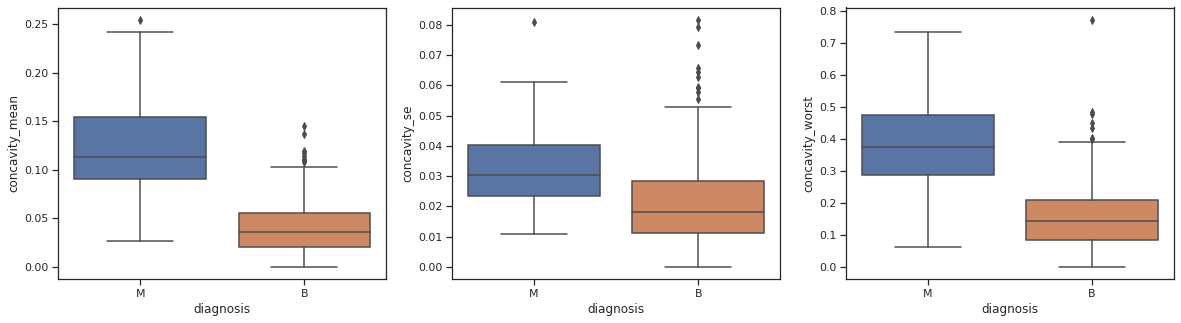

In [ ]:
### Boxplot 7:
### Diagnosis vs Concavity

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'concavity_mean', data = df_out)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'concavity_se', data = df_out)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'concavity_worst', data = df_out)
plt.show()

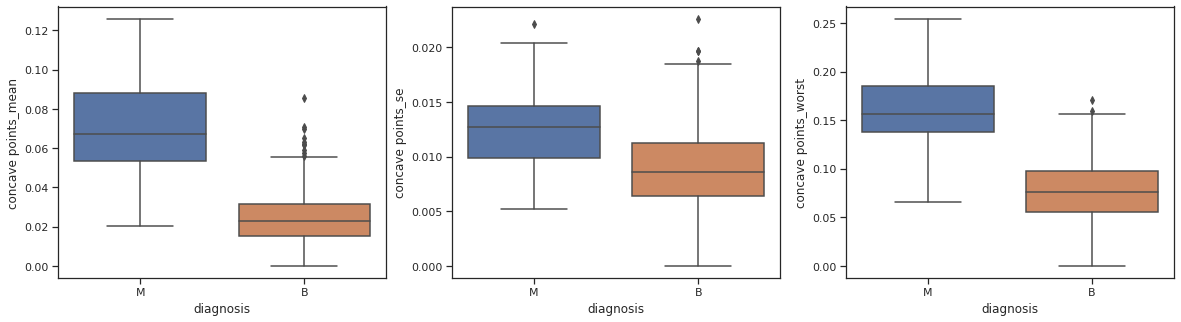

In [ ]:
### Boxplot 8:
### Diagnosis vs Concave points

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'concave points_mean', data = df_out)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'concave points_se', data = df_out)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'concave points_worst', data = df_out)
plt.show()

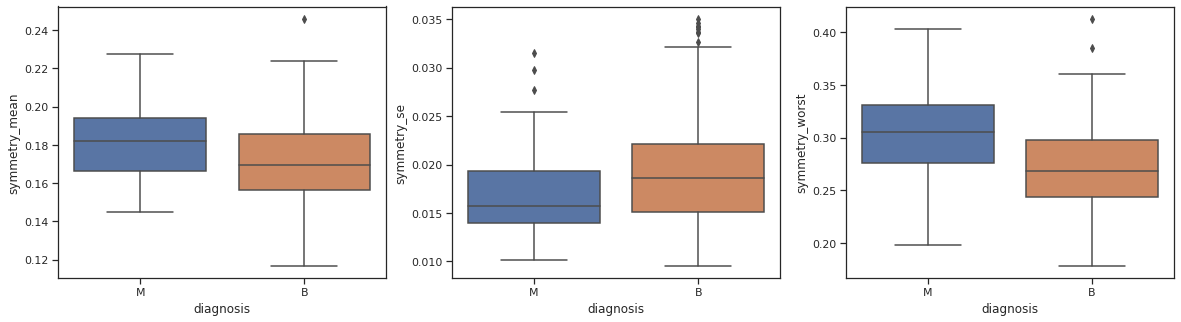

In [ ]:
### Boxplot 9:
### Diagnosis vs Symmetry

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'symmetry_mean', data = df_out)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'symmetry_se', data = df_out)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'symmetry_worst', data = df_out)
plt.show()

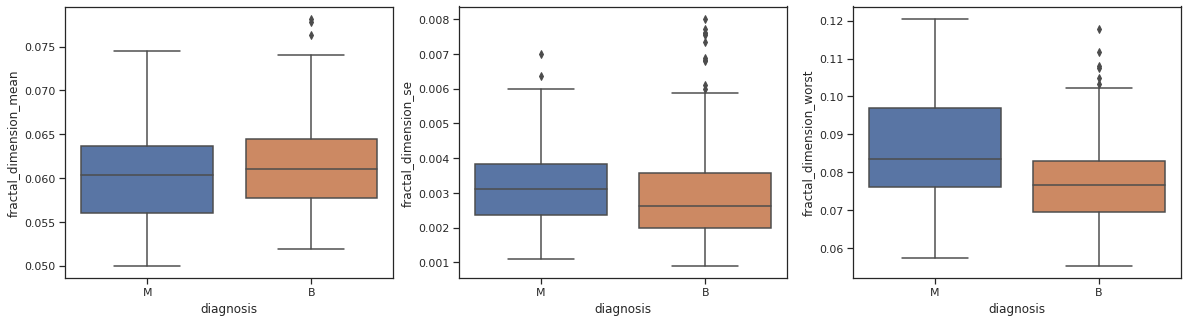

In [ ]:
### Boxplot 10:
### Diagnosis vs Fractal_dimension

sns.set(style="ticks")
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'diagnosis', y = 'fractal_dimension_mean', data = df_out)
plt.subplot(1,3,2)
sns.boxplot(x = 'diagnosis', y = 'fractal_dimension_se', data = df_out)
plt.subplot(1,3,3)
sns.boxplot(x = 'diagnosis', y = 'fractal_dimension_worst', data = df_out)
plt.show()

##Observation on Boxplot (after outliers removal)-

-Skewness is reduced

-Mean changes 

##5. Normalized the data if required, and write a note for what, why and how you performed normalization.

In [ ]:
#normalizing the data

# Let's determine the values of y and x axes
y = df.diagnosis.values
x = df.drop(["diagnosis"], axis=1)

x_mean = x.mean()
x_std = x.std()
x_norm = (x - x_mean)/x_std
print(x_norm.shape)
x_norm

(569, 30)


radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0       1.096100     -2.071512  ...        2.748204                 1.935312
1       1.828212     -0.353322  ...       -0.243675                 0.280943
2       1.578499      0.455786  ...        1.151242                 0.201214
3      -0.768233      0.253509  ...        6.040726                 4.930672
4       1.748758     -1.150804  ...       -0.867590                -0.396751
..           ...           ...  ...             ...                      ...
564     2.109139      0.720838  ...       -1.358963                -0.708467
565     1.703356      2.083301  ...       -0.531387                -0.973122
566     0.701667      2.043775  ...       -1.103578                -0.318129
567     1.836725      2.334403  ...        1.917396                 2.217684
568    -1.806811      1.220718  ...       -0.048096                -0.750546

[569 rows x 30 columns]

##Normalization:

Purpose- It is done if some of the columns have very high numeric values, they will suppress the affect of other columns. Columns with lesser values wouldn't show much in the model.

IQR shows high values for- radius_mean                  4.080000, texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.40000, 
area_se                     27.340000, radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000

Therefore, normalization was needed to scale down the above values.
